In [2]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [3]:
dataset= r'out2 ccopy 2.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [4]:
data

,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [8]:
# ionic radius:   from https://arxiv.org/pdf/1606.03425.pdf
# https://en.wikipedia.org/wiki/Ionic_radius
# CH3NH3+ 2.23 A
# N2H5+  2.19 A
# N2H3+  2.08 A
# Taking the ionic radii of Pb, Br, and Cl to be 1.19 ˚A, 1.96 ˚A, and 1.81 ˚A, respective
# Pb  1.19
# Br  1.96
# Cl  1.81

# Rb  1.49      1.52         1.66
# Cs  1.69
# Sn  1.12
# I  2.06
rA=1.29*data["CH5N2"]+2.23*data["CH3NH3"]+1.49*data["Rb"]+1.69*data["Cs"]
rA

# tolerance=(1.29*data["CH5N2"]+2.23*data["CH3NH3"]+1.49*data["Rb"]+1.69*data["Cs"])+(2.06*data["I"]+1.96*["Br"])/np.sqrt(2)/(1.19*data["Pb"]+1.12*data["Sn"])+(2.06*data["I"]+1.96*["Br"])
# data1=data.insert(0,'tolerance', tolerance)

0     6.03
1     3.09
2     6.18
3     6.18
4     6.18
      ... 
73    3.09
74    6.18
75    6.18
76    5.88
77    5.88
Length: 78, dtype: float64

In [10]:
rX=(2.06*data["I"]+1.96*data["Br"])/3
rX

0     2.01
1     1.03
2     2.06
3     2.06
4     2.06
      ... 
73    1.03
74    2.06
75    2.06
76    1.96
77    1.96
Length: 78, dtype: float64

In [11]:
rB=(1.19*data["Pb"]+1.12*data["Sn"])
rB

0     1.19
1     1.19
2     1.19
3     1.19
4     1.19
      ... 
73    1.19
74    1.19
75    1.19
76    1.19
77    1.19
Length: 78, dtype: float64

In [16]:
tolerance=(rA+rX)/(rB+rX)/np.sqrt(2)
tolerance

0     0.833060
1     0.909683
2     0.933381
3     0.933381
4     0.933381
        ...   
73    1.038364
74    0.863606
75    0.741918
76    0.819346
77    0.819346
Length: 78, dtype: float64

In [23]:
data.insert(0,'tolerance', tolerance)

,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [24]:
octahedral=rB/rX
octahedral

0     0.592040
1     1.155340
2     0.577670
3     0.577670
4     0.577670
        ...   
73    1.155340
74    0.577670
75    0.577670
76    0.607143
77    0.607143
Length: 78, dtype: float64

In [57]:
data.insert(0,'tolerance', tolerance)
data.insert(1,'octahedral', octahedral)
data

,tolerance,octahedral,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.833060,0.592040,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.909683,1.155340,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.933381,0.577670,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.933381,0.577670,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.933381,0.577670,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1.038364,1.155340,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.863606,0.577670,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.741918,0.577670,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.819346,0.607143,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [59]:
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

In [60]:
data

,tolerance,octahedral,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.833060,0.592040,0.500,0.500,0.00,0.00,1.0,0.0,1.50,1.50,6.61,0.65,5.5210,107.868000,4.50,20.500
1,0.909683,1.155340,0.200,0.400,0.00,0.40,1.0,0.0,1.50,0.00,3.62,2.68,1.3670,107.868000,4.50,20.100
2,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,3.62,2.68,1.3670,107.868000,4.50,19.040
3,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,5.44,0.72,0.8400,107.868000,4.50,18.820
4,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,6.61,0.65,5.5210,107.868000,4.50,18.340
5,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,2.20,2.40,-6.1000,107.868000,4.50,17.920
6,1.038364,1.155340,0.000,1.000,0.00,0.00,1.0,0.0,1.50,0.00,6.62,2.30,5.6919,26.981538,4.50,17.800
7,0.840170,0.560680,0.500,0.500,0.00,0.00,0.5,0.5,3.00,0.00,2.20,2.40,-6.1000,107.868000,4.50,17.700
8,0.728864,0.577670,1.000,0.000,0.00,0.00,1.0,0.0,3.00,0.00,3.62,2.68,1.3670,107.868000,4.50,17.400
9,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,3.62,2.68,1.3670,107.868000,4.50,17.130


In [67]:
# data.drop(index = [68],inplace = True)
data=data.reset_index()
data

,index,tolerance,octahedral,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0,0.833060,0.592040,0.500,0.500,0.00,0.00,1.0,0.0,1.50,1.50,6.61,0.65,5.5210,107.868000,4.50,20.500
1,1,0.909683,1.155340,0.200,0.400,0.00,0.40,1.0,0.0,1.50,0.00,3.62,2.68,1.3670,107.868000,4.50,20.100
2,2,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,3.62,2.68,1.3670,107.868000,4.50,19.040
3,3,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,5.44,0.72,0.8400,107.868000,4.50,18.820
4,4,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,6.61,0.65,5.5210,107.868000,4.50,18.340
5,5,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,2.20,2.40,-6.1000,107.868000,4.50,17.920
6,6,1.038364,1.155340,0.000,1.000,0.00,0.00,1.0,0.0,1.50,0.00,6.62,2.30,5.6919,26.981538,4.50,17.800
7,7,0.840170,0.560680,0.500,0.500,0.00,0.00,0.5,0.5,3.00,0.00,2.20,2.40,-6.1000,107.868000,4.50,17.700
8,8,0.728864,0.577670,1.000,0.000,0.00,0.00,1.0,0.0,3.00,0.00,3.62,2.68,1.3670,107.868000,4.50,17.400
9,9,0.933381,0.577670,0.000,1.000,0.00,0.00,1.0,0.0,3.00,0.00,3.62,2.68,1.3670,107.868000,4.50,17.130


In [68]:
#读取原数据集的特征和目标值
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [70]:
# 随机过采样
ros = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(X_train, y_train.astype('int'))
print('随机过采样后标签数据统计：', Counter(y_ros))

param_grid = {
    'n_estimators':[10,11,13,15,17,19],       # 决策树个数-随机森林特有参数
    'random_state':[0,10,42],
    'min_samples_split':[2,3],                     # 叶子的最小拆分样本
    'max_features':[0.1,0.2,0.3],  # 每棵决策树使用的变量占比-随机森林特有参数（结合原理）
    'max_depth':[8,9,10,20]                # 深度：这里是森林中每棵决策树的深度
}

# neg_mean_squared_error   ‘neg_mean_absolute_error’
rfr = ensemble.RandomForestRegressor()
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv=10)
rfr_cv.fit(X_ros, y_ros)
print(rfr_cv.best_params_, rfr_cv.best_score_) # 输出最优参数及最优模型得分

随机过采样后标签数据统计： Counter({14: 9, 4: 9, 5: 9, 1: 9, 13: 9, 19: 9, 8: 9, 17: 9, 10: 9, 18: 9, 9: 9, 16: 9, 12: 9, 20: 9, 15: 9, 3: 9, 7: 9, 11: 9})
{'max_depth': 20, 'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 13, 'random_state': 10} -2.2612143230073096


In [71]:
#计算准确率
clf = RandomForestRegressor(max_depth=20,max_features=0.3, min_samples_split=2, n_estimators=13,random_state=10)
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

R2: 0.8370596063775475
RMSE: 5.077860280774284
r: (0.024565912980692182, 0.9280444556049184)
MAE: 4.348259615384615
R2b: -0.22403922503001183
MSE: 25.78466503106509


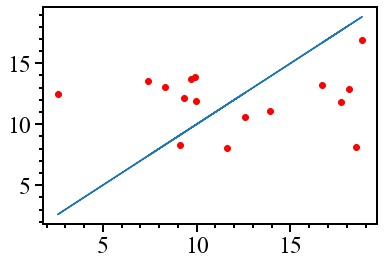

In [72]:
#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

In [76]:
X_train=pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.285714,0.581125,0.344482,0.500,0.500,0.0,0.00,1.0,0.0,0.500000,0.500000,0.283560,1.000000,0.651552,0.475845,0.0
1,0.532468,0.612130,0.000000,0.000,1.000,0.0,0.00,1.0,0.0,1.000000,1.000000,0.283560,1.000000,0.651552,0.988902,1.0
2,0.649351,0.785807,0.327759,0.000,1.000,0.0,0.00,1.0,0.0,1.000000,0.000000,0.358974,0.511194,0.569123,0.475845,0.0
3,0.493506,0.785807,0.327759,0.000,1.000,0.0,0.00,1.0,0.0,1.000000,0.000000,0.348416,0.544776,0.000000,0.475845,0.0
4,0.792208,0.835771,0.303954,0.000,1.000,0.0,0.00,0.0,1.0,0.500000,0.500000,0.283560,1.000000,0.651552,0.475845,0.0
5,0.688312,0.785807,0.327759,0.000,1.000,0.0,0.00,1.0,0.0,1.000000,0.000000,0.283560,1.000000,0.651552,0.475845,0.0
6,0.805195,0.618899,0.327759,0.400,0.600,0.0,0.00,1.0,0.0,1.000000,0.000000,0.283560,1.000000,0.651552,0.475845,0.0
7,0.727273,0.785807,0.327759,0.000,1.000,0.0,0.00,1.0,0.0,1.000000,0.000000,0.283560,1.000000,0.651552,0.475845,1.0
8,0.948052,1.000000,1.000000,0.000,1.000,0.0,0.00,1.0,0.0,0.500000,0.000000,0.283560,1.000000,0.651552,1.000000,0.0
9,0.077922,1.000000,1.000000,0.000,1.000,0.0,0.00,1.0,0.0,0.500000,0.000000,0.736048,0.858209,1.000000,0.000000,0.0


In [77]:
y_train=pd.DataFrame(y_train)
y_train

,0
0,14.400
1,4.200
2,14.850
3,5.780
4,1.080
5,5.600
6,13.280
7,19.340
8,8.290
9,17.800


In [78]:
X_test=pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.625000,0.645861,0.028571,0.000000,1.00,0.0,0.000000,1.0,0.0,1.0,0.0,0.508108,1.000000,0.954969,0.000000,0.0
1,1.000000,0.000000,0.028571,1.000000,0.00,0.0,1.000000,1.0,0.0,1.0,0.0,0.508108,1.000000,0.954969,0.000000,0.0
2,0.777778,0.645861,0.028571,0.000000,1.00,0.0,0.000000,1.0,0.0,1.0,0.0,0.124324,0.857143,0.000000,0.000000,0.0
3,0.708333,0.645861,0.028571,0.000000,1.00,0.0,0.000000,1.0,0.0,1.0,0.0,0.508108,1.000000,0.954969,0.000000,0.0
4,0.430556,0.068084,0.035697,0.952941,0.14,0.0,0.333333,1.0,0.0,0.7,1.0,0.508108,1.000000,0.954969,0.000000,0.0
5,0.319444,1.000000,1.000000,0.000000,1.00,0.0,0.000000,1.0,0.0,0.0,0.0,0.508108,1.000000,0.954969,0.000000,1.0
6,0.916667,0.645861,0.028571,0.000000,1.00,0.0,0.000000,1.0,0.0,1.0,0.0,0.508108,1.000000,0.954969,0.978826,1.0
7,0.416667,0.645861,0.028571,0.000000,1.00,0.0,0.000000,1.0,0.0,1.0,0.0,0.000000,0.193878,1.000000,0.000000,0.0
8,0.583333,0.369902,0.028571,0.470588,0.60,0.0,0.000000,1.0,0.0,1.0,0.0,0.508108,1.000000,0.954969,0.000000,0.0
9,0.930556,0.645861,0.028571,0.000000,1.00,0.0,0.000000,1.0,0.0,1.0,0.0,1.000000,0.000000,0.887570,0.000000,1.0


In [79]:
y_test=pd.DataFrame(y_test)
y_test

,0
0,18.11
1,13.90
2,11.60
3,9.70
4,9.10
5,12.60
6,7.39
7,9.30
8,8.33
9,2.60


In [80]:
# 随机过采样xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

ros = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(X_train, y_train.astype('int'))
print('随机过采样后标签数据统计：', Counter(y_ros))

param_grid = {
    'n_estimators':[1000,2000,2500],       # 决策树个数-随机森林特有参数
    'eta':[0.1,0.2],
    'subsample':[0.7,0.8,0.9],                     # 叶子的最小拆分样本
    'colsample_bytree':[0.8,0.9,0.7],  # 每棵决策树使用的变量占比-随机森林特有参数（结合原理）
    'max_depth':[8,9,10,20,40]                # 深度：这里是森林中每棵决策树的深度
}

# neg_mean_squared_error   ‘neg_mean_absolute_error’
rfr = XGBRegressor()
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv=10)
rfr_cv.fit(X_ros, y_ros)
print(rfr_cv.best_params_, rfr_cv.best_score_) # 输出最优参数及最优模型得分

随机过采样后标签数据统计： Counter({0: 1})
{'colsample_bytree': 0.8, 'eta': 0.2, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.8} -1.4553314492354243


In [81]:
#读取原数据集的特征和目标值
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)


In [85]:
#计算准确率
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

R2: 0.03061484015957372
RMSE: 4.609212773280815
r: (0.3282354957351245, 0.2145375715988422)
MAE: 3.165868750000001
R2b: -0.008526594502793916
MSE: 21.244842389375023


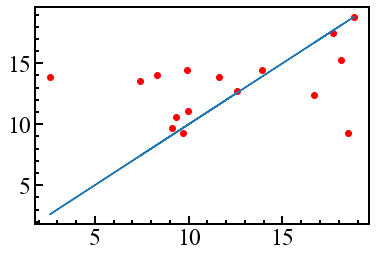

In [86]:
#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()